# Data of a complex model with induced magnetization

This notebook generates a toal field anomaly (TFA) and an amplitude of the anomalous magnetic field (AMF) data from a complex model in a regular grid or flightlines.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import pandas as pd

from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from fatiando.gravmag import polyprism
from fatiando.vis import mpl

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Auxiliary functions

In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

### The model

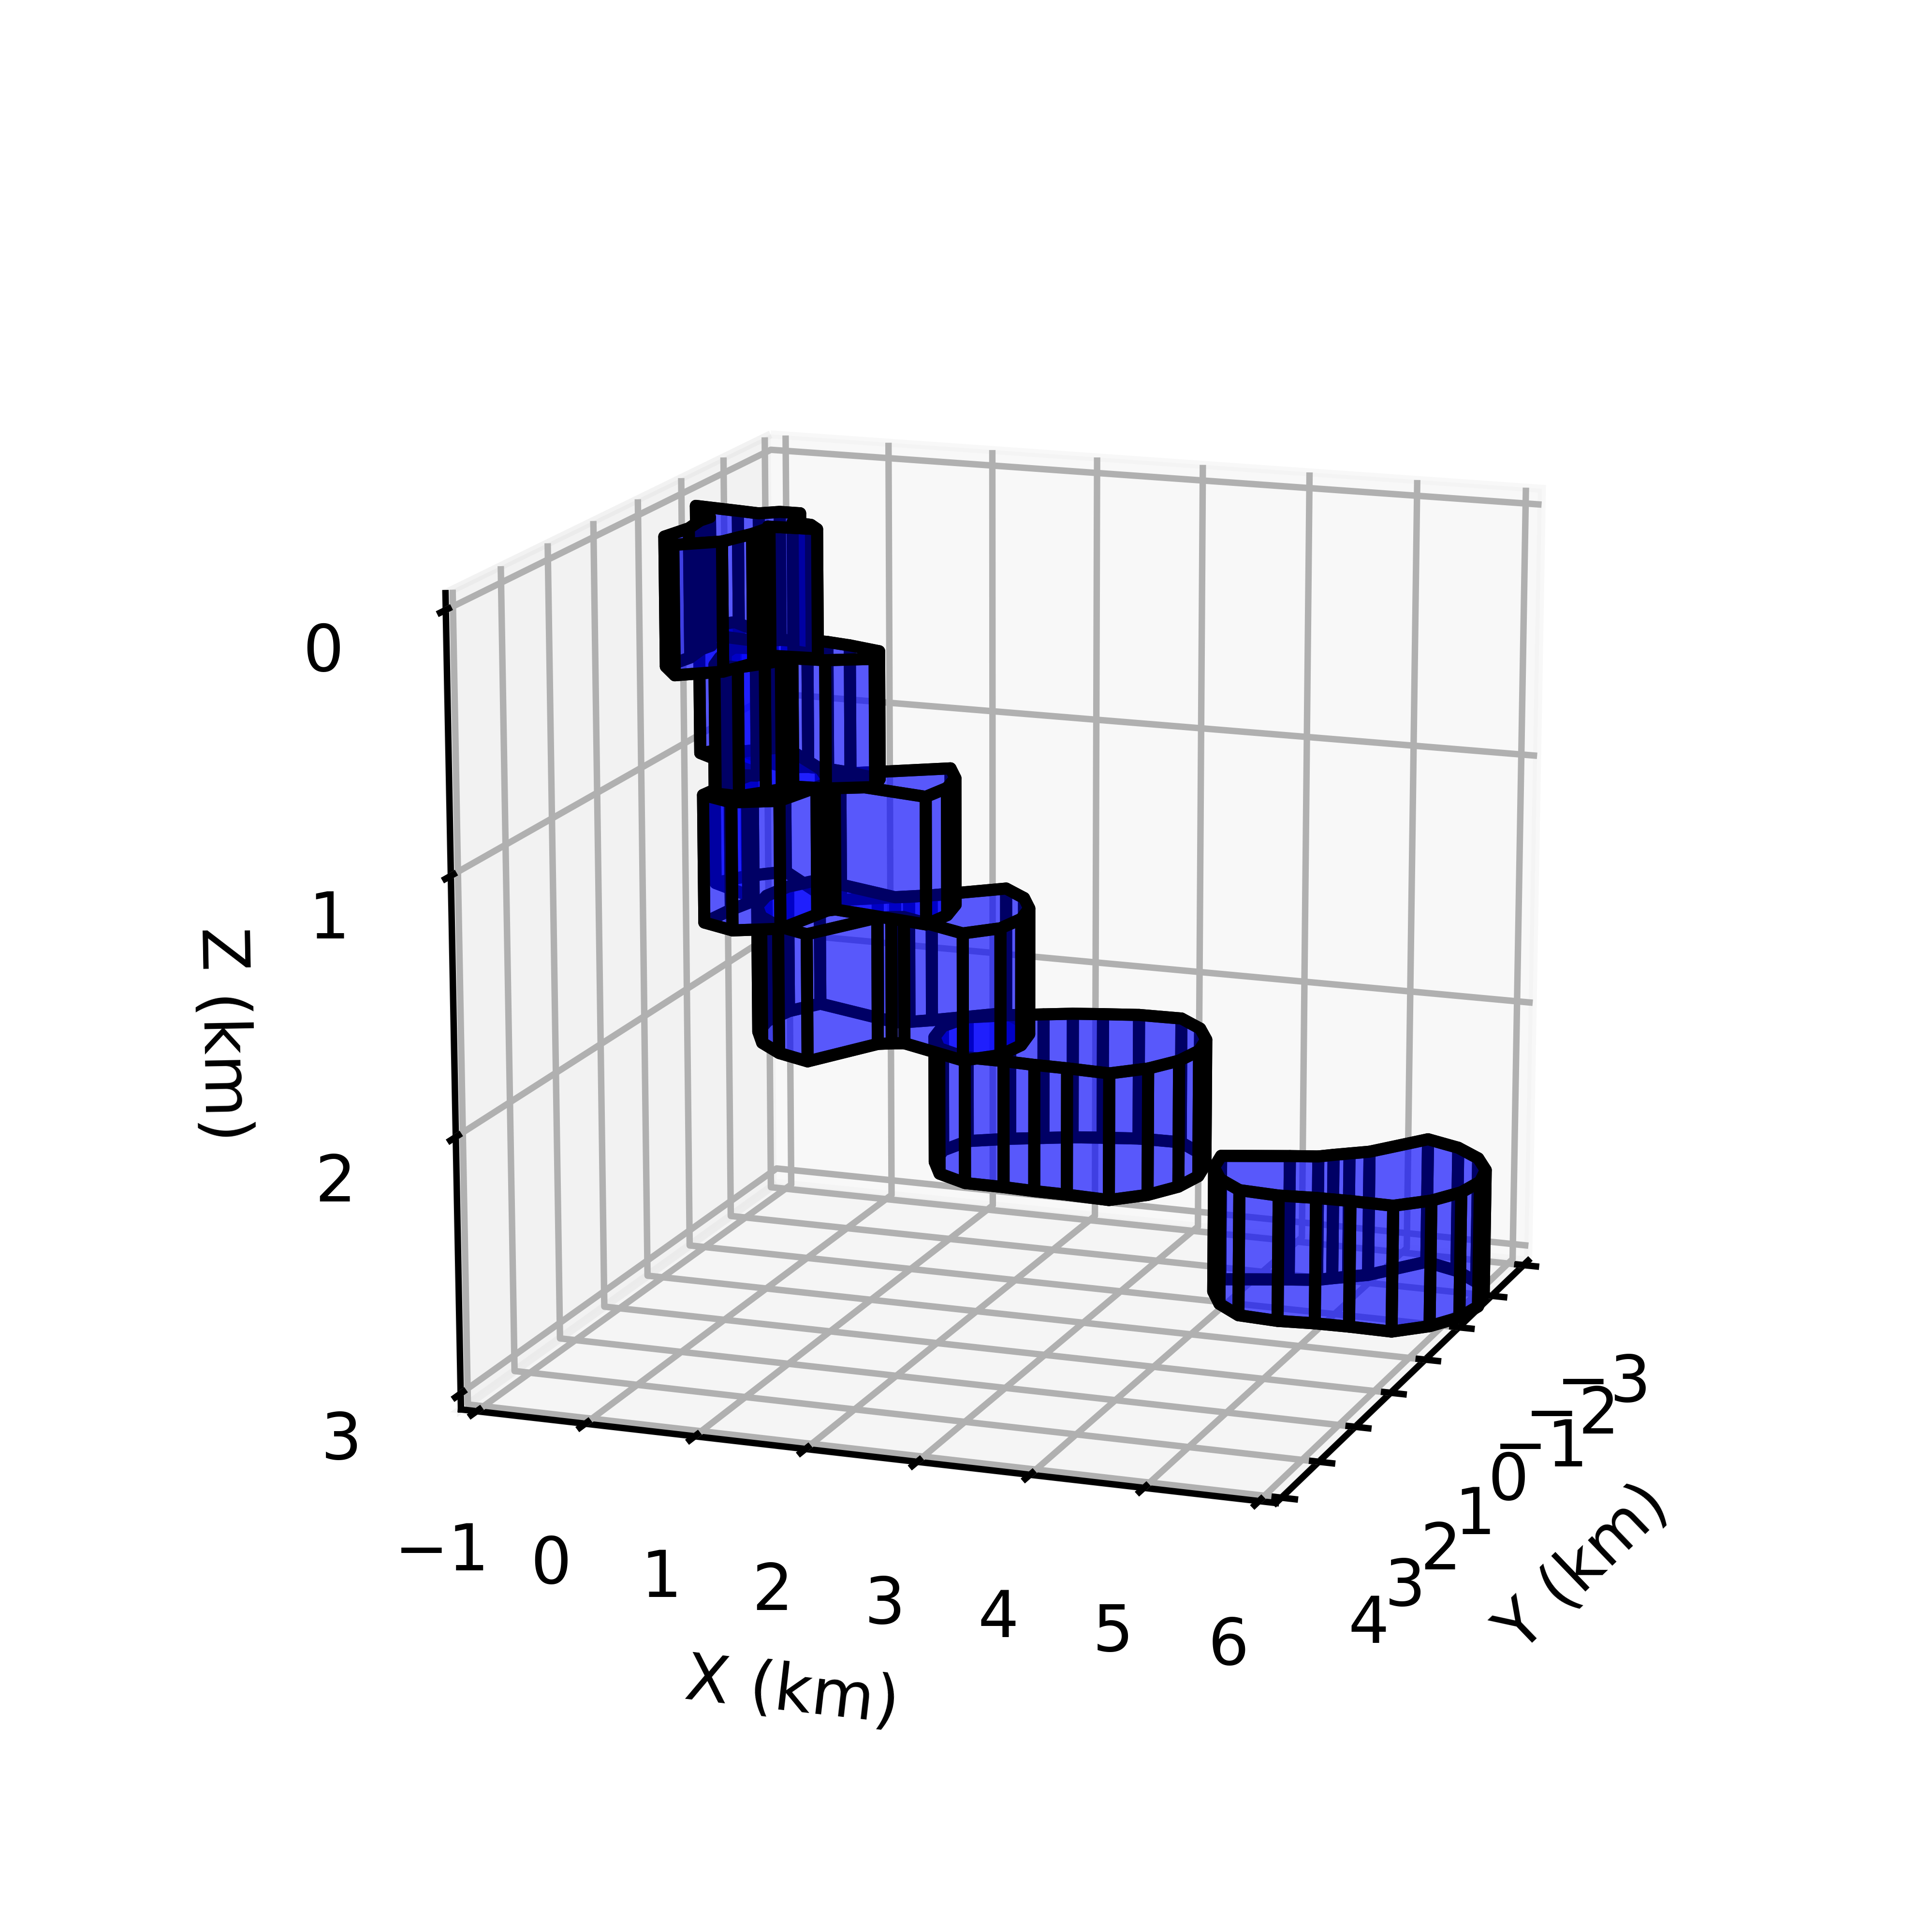

In [3]:
img(filename='model.png')

### Importing model and grid

In [4]:
model_dir = 'model.pickle'

In [5]:
with open(model_dir) as w:
        model = pickle.load(w)

In [6]:
df = pd.read_csv('../anitapolis/anitapolis_decimated_tfa_residual_cut.txt', header=0, sep=' ')

In [7]:
df['X'] -= np.mean(df['X'])
df['Y'] -= np.mean(df['Y'])

In [8]:
df['GPSALT'] = - df['GPSALT'] + 800

In [9]:
mask = (df['GPSALT'].get_values()<0.)
df = df[mask]

In [10]:
data = dict()

In [11]:
data['x'] = df['X'].get_values()
data['y'] = df['Y'].get_values()
data['z'] = df['GPSALT'].get_values()
data['N'] = data['x'].size

In [12]:
model['prisms'][0].props

{'magnetization': array([ 7.61848593,  1.20664963, -9.19253332])}

### Generating data

In [13]:
# main field
data['main_field'] = [-21.5, -18.7]

# TFA data
data['tfa'] = polyprism.tf(data['x'], data['y'], data['z'],
            model['prisms'], data['main_field'][0], data['main_field'][1]) # predict data

amp_noise = 5.
data['tfa_obs'] = data['tfa'] + np.random.normal(loc=0., scale=amp_noise,
                               size=data['N']) # noise corrupted data

### Data ploting

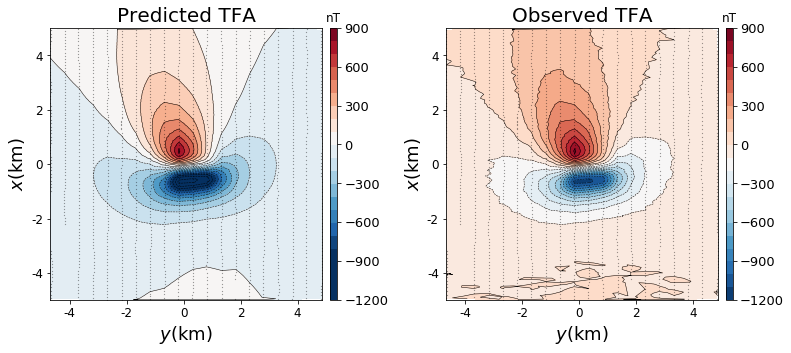

In [14]:
plt.figure(figsize=(13,5))

plt.subplot(121)
plt.title('Predicted TFA', fontsize=20)
plt.tricontour(data['y'], data['x'], data['tfa'], 20, colors='k', linewidths=0.5).ax.tick_params(labelsize=12)
plt.tricontourf(data['y'], data['x'], data['tfa'], 20, cmap='RdBu_r', vmin=-np.max(data['tfa'])).ax.tick_params(labelsize=12)
plt.plot(data['y'], data['x'], '.k', markersize=0.3)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(122)
plt.title('Observed TFA', fontsize=20)
plt.tricontour(data['y'], data['x'], data['tfa_obs'], 20, colors='k', linewidths=0.5).ax.tick_params(labelsize=12)
plt.tricontourf(data['y'], data['x'], data['tfa_obs'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.plot(data['y'], data['x'], '.k', markersize=0.3)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.show()

### Saving in an outer file

In [15]:
file_name = 'data.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data, f)